In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
full_annualpath = "data/full_yearly.csv"
full_annual = pd.read_csv(full_annualpath)
full_annual
# drop index

,Year,Number of Fires,Avg. Acres Burned,Median Acres Burned,Avg. Fire Duration (Days),Median Fire Duration (Days),Mean Snow Depth (in),Max Snow Depth (in)
0,2013,14,2264.43,106.0,2.78,1.07,44.16,295
1,2014,9,10943.00,85.0,4.62,1.58,38.54,295
2,2015,13,5788.54,104.0,6.67,3.94,23.51,313
3,2016,30,161.07,87.5,2.26,1.18,54.93,311
4,2017,51,819.82,76.0,166.19,171.80,94.22,312
5,2018,27,5906.89,67.0,148.46,155.84,29.63,202
6,2019,21,82.05,50.0,3.31,0.70,84.85,330
7,2020,30,1967.23,77.0,2.08,0.73,40.44,332
8,2021,17,4254.88,118.0,11.89,1.92,43.72,322
9,2022,12,113.17,41.5,5.88,4.02,43.06,329


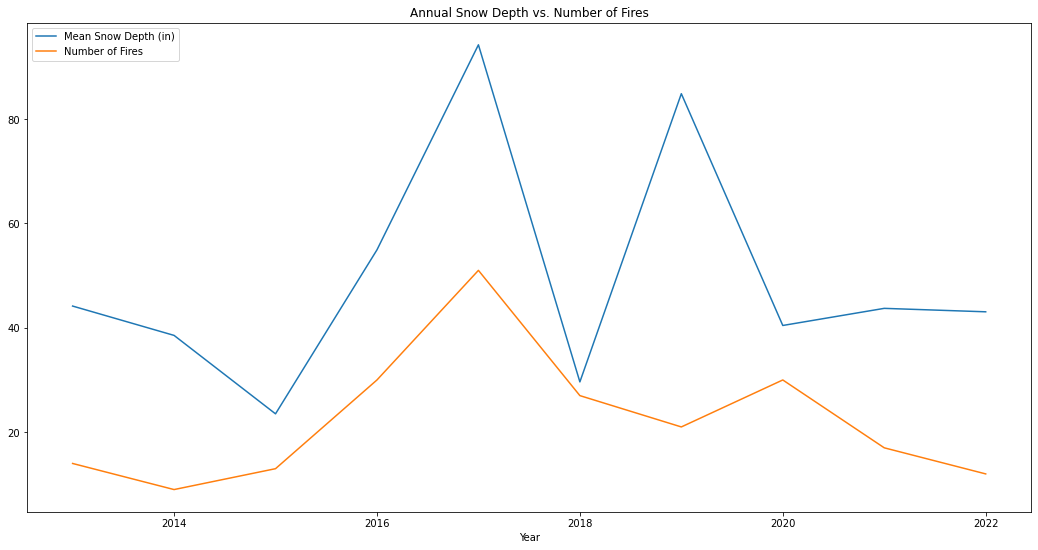

In [3]:
outputpath = "figures/annual_depth_fire_count_line"

x_data = full_annual["Year"]
y_data = full_annual["Mean Snow Depth (in)"] 
y_data1 = full_annual["Number of Fires"]
plt.figure(figsize=(18,9))

snow_depth = plt.plot(x_data, y_data, label = "Mean Snow Depth (in)")
fire_numbers = plt.plot(x_data, y_data1, label = "Number of Fires")
plt.legend(loc = "upper left")
plt.xlabel("Year")
plt.title("Annual Snow Depth vs. Number of Fires")
plt.savefig(outputpath)
plt.show()